# PDF extraction und Debugging

In [2]:
# Was wollen wir tun? Die 82 PDFs auslesen. 
# 3 Kolonnen bilden. Eine mit dem Datum, 
# eine mit der Seriennummer, und eine 
# mit dem Text

In [3]:
# Wie gehen wir dabei vor? Schreibt das für 
# euch auf, so viele Schritte wie möglich.

In [4]:
# Wie öffne ich ein File? Versuchen wir es 
# auf der klassischen Art und Weise.
# !ls "pdfs"

In [5]:
filename = "Vk_20180226_08documents0.pdf"
file = open("pdfs/"+filename, "r")
print(file)

<_io.TextIOWrapper name='pdfs/Vk_20180226_08documents0.pdf' mode='r' encoding='UTF-8'>


In [6]:
filename = "Vk_20180226_08documents0.pdf"
file = open("pdfs/"+filename, "r")
print(file.read())

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 in position 11: invalid start byte

In [7]:
#Googelt: UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5

In [8]:
file.decode('windows-1252')

AttributeError: '_io.TextIOWrapper' object has no attribute 'decode'

In [9]:
#Googelt: UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb5 python pdf

In [10]:
#https://stackoverflow.com/questions/42333341/how-to-decode-a-extracted-pfd-file-from-a-website-in-python

In [11]:
#What makes you think the file is an encoded string? It's not a string at all; a pdf is not readable, it's a binary format. You can't just iterate through and print it out.

# Also: Suchen wir uns ein Modul, um Text aus PDFs zu ziehen

In [12]:
# Macht ein paar Vorschläge, was wir brauchen könnten?

In [13]:
import textract
text = textract.process("pdfs/Vk_20180226_08documents0.pdf")

In [14]:
text

b'COOK\xc2\xae\n\nCook Medical Europe\nO\'Halloran Road,\nNational Technological Park,\nLimerick, Ireland.\n\nPhone: + 353 61 334440\n\nCDringende Mitteilung:\n\nFax: + 353 61 334441\n\nSicherheitsrelevante Korrektive Ma\xc3\x9fnahme im Feld\n\nOHandelsname des betroffenen Produktes: Endovaskul\xc3\xa4re iliakale Bifurkationsprothese Zenith Branch\n(ZBIS)\n\nOHersteller: William A. Cook Australia Pty Ltd\nCook-Referenznummer: 2018FA0002, QCR-83\n\nKArt der Ma\xc3\x9fnahme: Sicherheitsrelevante korrektive Massnahme\n---------------------------------------------------------------------------------------------------------------------------\nDatum: 15. Februar 2\xc2\xae018 Zu H\xc3\xa4nden: Gesch\xc3\xa4ftsf\xc3\xbchrung / Risikomanagement / Einkaufsabteilung / Krankenpflege-Direktion\n\nDetails zum betroffenen Produkt:\n\nProdukt-Markenname\n\nArtikelnummer (RPN)\n\nEndovaskul\xc3\xa4re iliakale Bifurkationsprothese Zenith\nBranch (ZBIS) Patientenkarte\n\nZBIS-12-61-58 ZBIS-12-61-41 ZBIS-

In [15]:
# Diese vielen Zeichen stören mich. Die will ich wegnehmen. 
# Versuchen wir das. Hier ist die Documentation. 
# https://media.readthedocs.org/pdf/textract/latest/textract.pdf
text = textract.process("pdfs/Vk_20180226_08documents0.pdf",  method='pdfminer', encoding='ascii')
text = text.decode("ascii").replace("\n", " ")

In [16]:
text

'         Cook Medical Europe  OHalloran Road,  National Technological Park,  Limerick, Ireland.  Phone: + 353 61 334440   Fax: + 353 61 334441                    Dringende Mitteilung:   COOK  C O O K  Sicherheitsrelevante Korrektive Manahme im Feld     Handelsname des betroffenen Produktes: Endovaskulre iliakale Bifurkationsprothese Zenith Branch  (ZBIS)    Hersteller:  William A. Cook Australia Pty Ltd    Cook-Referenznummer: 2018FA0002, QCR-83     Art der Manahme:  Sicherheitsrelevante korrektive Massnahme  ---------------------------------------------------------------------------------------------------------------------------    Datum: 15. Februar 2018    Zu Hnden: Geschftsfhrung / Risikomanagement / Einkaufsabteilung / Krankenpflege-Direktion      Details zum betroffenen Produkt:      Produkt-Markenname   Artikelnummer (RPN)   GPN   Lotnummern   ZBIS-12-61-58  ZBIS-12-61-41  ZBIS-12-45-58  ZBIS-12-45-41  ZBIS-10-61-41  ZBIS-10-45-41   G38344  G38618  G38617  G38616  G38614  G386

In [17]:
#bauen wir einen For loop über alles über alle Dokumente, extrahieren 
#den ganzen Text. Und bauen damit eine Tabelle mit Text und Namen
#der Datei

In [18]:
import os
pdfs = os.listdir('pdfs')
lst = []

for pdf in pdfs:
    text = textract.process("pdfs/"+pdf, method='pdfminer', encoding='ascii')
    text = text.decode("ascii").replace("\n", " ")
    mini_dict = {'Text':text,
                 'File':pdf}
    lst.append(mini_dict)
    

ShellError: The command `pdf2txt.py pdfs/Vk_20180517_12documents0.pdf` failed with exit code 1
------------- stdout -------------
b''------------- stderr -------------
b'Traceback (most recent call last):\n  File "/usr/local/bin/pdf2txt.py", line 115, in <module>\n    if __name__ == \'__main__\': sys.exit(main(sys.argv))\n  File "/usr/local/bin/pdf2txt.py", line 107, in main\n    caching=caching, check_extractable=True):\n  File "/Library/Python/2.7/site-packages/pdfminer/pdfpage.py", line 121, in get_pages\n    doc = PDFDocument(parser, password=password, caching=caching)\n  File "/Library/Python/2.7/site-packages/pdfminer/pdfdocument.py", line 326, in __init__\n    self._initialize_password(password)\n  File "/Library/Python/2.7/site-packages/pdfminer/pdfdocument.py", line 348, in _initialize_password\n    raise PDFEncryptionError(\'Unknown algorithm: param=%r\' % param)\npdfminer.pdfdocument.PDFEncryptionError: Unknown algorithm: param={\'CF\': {\'StdCF\': {\'Length\': 16, \'CFM\': /AESV2, \'AuthEvent\': /DocOpen}}, \'O\': \'q\\x85\\xcd(\\xe6\\xad(\\xeeb\\x0e\\xfa\\xa6\\xa9\\x0c\\xcd\\xef+B\\x0eE\\xb9j\\xa1\\xe3;}\\xf1\\t\\x01Mx\\x99\', \'Filter\': /Standard, \'P\': -1340, \'Length\': 128, \'R\': 4, \'U\': \'s\\x9fXt\\xd5ae\\x19\\xfb\\xba\\x01\\xc7\\x97\\xc9\\xfb\\xad\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\', \'V\': 4, \'StmF\': /StdCF, \'StrF\': /StdCF}\n'

In [19]:
#Fehlermeldung, wie gehen wir nun vor, um diesen Fehler zu finden und zu beheben? 
#In der Meldung unten, sehen wir, wo der Fehler passiert ist. 
pdfs = os.listdir('pdfs')
lst = []

for pdf in pdfs:
    print(pdf)
    text = textract.process("pdfs/"+pdf, method='pdfminer', encoding='ascii')
    text = text.decode("ascii").replace("\n", " ")
    mini_dict = {'Text':text,
                 'File':pdf}
    lst.append(mini_dict)

Vk_20180514_49documents0.pdf
Vk_20180522_02documents1.pdf
Vk_20180413_17documents3.pdf
Vk_20180525_03documents1.pdf
Vk_20180529_02documents2.pdf
Vk_20180517_02documents2.pdf
Vk_20180517_02documents3.pdf
Vk_20180525_03documents0.pdf
Vk_20180413_17documents2.pdf
Vk_20180522_02documents0.pdf
Vk_20180514_49documents1.pdf
Vk_20180517_06documents0.pdf
Vk_20180522_02documents2.pdf
Vk_20180413_17documents0.pdf
Vk_20180525_03documents2.pdf
Vk_20180517_02documents1.pdf
Vk_20180529_02documents1.pdf
Vk_20180417_10documents0.pdf
Vk_20180417_10documents1.pdf
Vk_20180517_02documents0.pdf
Vk_20180529_02documents0.pdf
Vk_20180413_17documents1.pdf
Vk_20180514_49documents2.pdf
Vk_20180528_08documents1.pdf
Vk_20180509_08documents0.pdf
Vk_20180517_12documents0.pdf


ShellError: The command `pdf2txt.py pdfs/Vk_20180517_12documents0.pdf` failed with exit code 1
------------- stdout -------------
b''------------- stderr -------------
b'Traceback (most recent call last):\n  File "/usr/local/bin/pdf2txt.py", line 115, in <module>\n    if __name__ == \'__main__\': sys.exit(main(sys.argv))\n  File "/usr/local/bin/pdf2txt.py", line 107, in main\n    caching=caching, check_extractable=True):\n  File "/Library/Python/2.7/site-packages/pdfminer/pdfpage.py", line 121, in get_pages\n    doc = PDFDocument(parser, password=password, caching=caching)\n  File "/Library/Python/2.7/site-packages/pdfminer/pdfdocument.py", line 326, in __init__\n    self._initialize_password(password)\n  File "/Library/Python/2.7/site-packages/pdfminer/pdfdocument.py", line 348, in _initialize_password\n    raise PDFEncryptionError(\'Unknown algorithm: param=%r\' % param)\npdfminer.pdfdocument.PDFEncryptionError: Unknown algorithm: param={\'CF\': {\'StdCF\': {\'Length\': 16, \'CFM\': /AESV2, \'AuthEvent\': /DocOpen}}, \'O\': \'q\\x85\\xcd(\\xe6\\xad(\\xeeb\\x0e\\xfa\\xa6\\xa9\\x0c\\xcd\\xef+B\\x0eE\\xb9j\\xa1\\xe3;}\\xf1\\t\\x01Mx\\x99\', \'Filter\': /Standard, \'P\': -1340, \'Length\': 128, \'R\': 4, \'U\': \'s\\x9fXt\\xd5ae\\x19\\xfb\\xba\\x01\\xc7\\x97\\xc9\\xfb\\xad\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\\x00\', \'V\': 4, \'StmF\': /StdCF, \'StrF\': /StdCF}\n'

In [21]:
#Bauen wir deshalb ein try: und except ein:
import os
pdfs = os.listdir('pdfs')
lst = []

for pdf in pdfs:
    try:
        text = textract.process("pdfs/"+pdf, method='pdfminer', encoding='ascii')
        text = text.decode("ascii").replace("\n", " ")
        mini_dict = {'Text':text,
                     'File':pdf}
        lst.append(mini_dict)
    except:
        mini_dict = {'Text':'Fehlermeldung',
                     'File':pdf}
        lst.append(mini_dict)

In [22]:
# Das geht nun ganz durch. Dauert aber sehr lange. Ich möchte aber wissen, wo ich stehe.
# Schauen wir uns das mit Progressbar an. 

In [23]:
import progressbar
bar = progressbar.ProgressBar() #Hier wir bar als Funktion defininiert.
lst = []

for pdf,i in zip(pdfs, bar(range(len(pdfs)))): #Hier wird die Funktion auf eine Liste mit integers 
                                               #angewandt, die genau gleich lang ist wie die 
                                               #länge der PDF LIste 
    try:
        text = textract.process("pdfs/"+pdf, method='pdfminer', encoding='ISO-8859-1')
        text = text.decode("ISO-8859-1").replace("\n", " ")
        mini_dict = {'Text':text,
                     'File':pdf}
        lst.append(mini_dict)
    except:
        mini_dict = {'Text':'Fehlermeldung',
                     'File':pdf}
        lst.append(mini_dict)

 98% (81 of 82) |######################### | Elapsed Time: 0:01:19 ETA: 0:00:01

In [25]:
#Schauen wir uns an, was wir haben
import pandas as pd
df = pd.DataFrame(lst)
df.head(10)

,File,Text
0,Vk_20180514_49documents0.pdf,
1,Vk_20180522_02documents1.pdf,Information urgente relative à la sécurité Re...
2,Vk_20180413_17documents3.pdf,"Dräger Schweiz AG, CH-3097 Liebefeld À latte..."
3,Vk_20180525_03documents1.pdf,BIBRAUN B. Braun Medical SA Seesatz 17 CH-...
4,Vk_20180529_02documents2.pdf,URGENT ...
5,Vk_20180517_02documents2.pdf,Smith & Nephew Orthopaedics AG Oberneuhofst...
6,Vk_20180517_02documents3.pdf,
7,Vk_20180525_03documents0.pdf,DIDRAUN B. Braun Medical AG Seesatz 17 C...
8,Vk_20180413_17documents2.pdf,"Dräger Schweiz AG, CH-3097 Liebefeld À latte..."
9,Vk_20180522_02documents0.pdf,Dringende Sicherheitsinformation Rückruf/Aust...


## Bilder in Text umwandeln

In [26]:
# Warum sind diese leeren Sachen da? Schauen wir das erte Dokument an. 
# Aha! Das ist ein Bild.

In [27]:
#Das können wir auch mit textract rausnehmen
#https://www.macports.org/install.php
#sudo port install tesseract-eng
#https://github.com/tesseract-ocr/tesseract/blob/master/doc/tesseract.1.asc#languages
#https://stackoverflow.com/questions/14800730/tesseract-running-error
text = textract.process("pdfs/Vk_20180514_49documents0.pdf", method='tesseract') #language='deu'
text = text.decode("ISO-8859-1").replace("\n", " ")


In [28]:
text

"I DRINGEND: SICHERHEITSHINWEIVS  waSSEDBURG â\x80\x94â\x80\x94â\x80\x9câ\x80\x98â\x80\x94â\x80\x98â\x80\x94mechcal  Wassmmurg Medical 5 v.  Edusannng a  6659 NA DODEWMRD THE NETHERLANDS T â\x80\x9831 yavaaa 700 500 F â\x80\x9831 umaa 453 055  RUCKRUF VON KANALVERBINDUNGS-  MATERIAL  vlo@\\vassenmvgmed 1:31 nl wassenbutgmecma! com  WASSENBURGÂ® REINIGUNGS- UND DESINFEKTIONSGERAT  ENDOSKOPIE  PRODUKTNAMEâ\x80\x98,  WASSENBURGâ\x80\x9d WD440. WD440 PT, WD415 Reinigungs- und  Desinfektionsgerat Endoskopie  DATUM: HANDLUNGSTYP: ZU HANDEN VON:  22. Mai 2018 Sicherheitsmassnahme Abteilungsleiter fur Dekontaminaï¬\x81on / Endoskopie  Angaben zu betroffenan Garâ\x80\x98a'ten:  Bei einigen Chargen der Kanalverhindungen fur die Verbindung van Endoskopen in WASSENBURGâ\x80\x9d Endoskop-Reinigungs- und Desinfektionsgeraten wurde ein Defskt feslgestellt, infolgedessen einige Verbindungsstï¬\x82cke wahrend der Endoskopaufbereilung auseinanderfallan kbnnenâ\x80\x98  Die belmffenen Artikel und Chargen

In [30]:
bar = progressbar.ProgressBar()
lst = []

for pdf,i in zip(pdfs, bar(range(len(pdfs)))):
    try:
        text = textract.process("pdfs/"+pdf, method='pdfminer', encoding='ISO-8859-1')
        text = text.decode("ISO-8859-1").replace("\n", " ")
        if len(text) < 40:
            text = textract.process("pdfs/"+pdf, method='tesseract', language='deu')
            text = text.decode("ISO-8859-1").replace("\n", " ")
            
        mini_dict = {'Text':text,
                     'File':pdf}
        lst.append(mini_dict)
    except:
        mini_dict = {'Text':'Fehlermeldung',
                     'File':pdf}
        lst.append(mini_dict)

 98% (81 of 82) |######################### | Elapsed Time: 0:05:54 ETA: 0:00:02

# Strukturieren wir den Inhalt noch etwas

In [31]:
df = pd.DataFrame(lst)

In [32]:
#Wie könnten wir das Eingangsdatum der dokumente ermitteln?
df.head()

,File,Text
0,Vk_20180514_49documents0.pdf,. DRINGEND: SICHERHEITSHINWELS W855â¬HBURG _...
1,Vk_20180522_02documents1.pdf,Information urgente relative à la sécurité Re...
2,Vk_20180413_17documents3.pdf,"Dräger Schweiz AG, CH-3097 Liebefeld À latte..."
3,Vk_20180525_03documents1.pdf,BIBRAUN B. Braun Medical SA Seesatz 17 CH-...
4,Vk_20180529_02documents2.pdf,URGENT ...


In [33]:
def date(elem):
    elem = elem[3:11]
    return elem
df['date'] = df['File'].apply(date)

In [34]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')

In [35]:
df.index = df['date']

In [36]:
df.head()

,File,Text,date
date,,,
2018-05-14,Vk_20180514_49documents0.pdf,. DRINGEND: SICHERHEITSHINWELS W855â¬HBURG _...,2018-05-14
2018-05-22,Vk_20180522_02documents1.pdf,Information urgente relative à la sécurité Re...,2018-05-22
2018-04-13,Vk_20180413_17documents3.pdf,"Dräger Schweiz AG, CH-3097 Liebefeld À latte...",2018-04-13
2018-05-25,Vk_20180525_03documents1.pdf,BIBRAUN B. Braun Medical SA Seesatz 17 CH-...,2018-05-25
2018-05-29,Vk_20180529_02documents2.pdf,URGENT ...,2018-05-29


In [37]:
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('fivethirtyeight')
%matplotlib inline

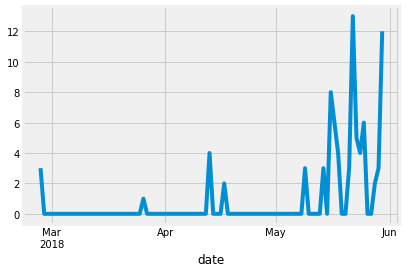

In [38]:
#Visualisieren wir das
df.resample('D')['File'].count().plot()

In [39]:
#Suchen wir noch nach Implantaten
df['implant'] = df['Text'].str.contains('implant')

In [40]:
df['implant'].value_counts()

False    72
True     10
Name: implant, dtype: int64

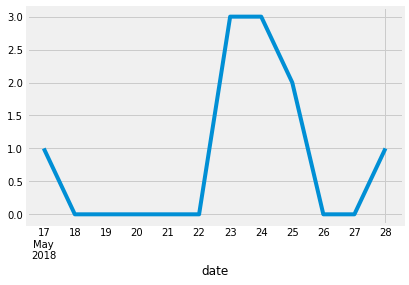

In [41]:
#Plotten wir diese Implants
df[df['implant']==True].resample('D')['implant'].count().plot()

# Speichern wir alle ab

In [42]:
df.to_csv('datafile.csv')